# NBA Prediction EDA (2017 - 2022)

## EDA 2017 - 2018


In [13]:
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
df2 = pd.read_parquet('/content/[2017, 2018]_game_stats.parquet.gzip')

### Examine the current data

This is just a quick visual inspectaion of the data to identify what data types are being used in the data frame.

In [15]:
df2.head()

,date,home_team,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,...,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts,arena
0,"Tue, Oct 25, 2016",CLE,45,94,.479,13,35,.371,14,19,...,13,29,42,17,6,6,18,22,88,Quicken Loans Arena
1,"Tue, Oct 25, 2016",POR,39,75,.520,13,19,.684,22,22,...,6,25,31,19,9,5,11,19,104,Moda Center
2,"Tue, Oct 25, 2016",GSW,40,85,.471,7,33,.212,13,18,...,21,34,55,25,13,3,13,19,129,Oracle Arena
3,"Wed, Oct 26, 2016",IND,47,93,.505,10,19,.526,26,34,...,10,39,49,26,8,8,15,27,121,Bankers Life Fieldhouse
4,"Wed, Oct 26, 2016",ORL,34,89,.382,6,18,.333,22,28,...,16,36,52,27,5,7,10,22,108,Amway Center


In [16]:
df2.tail()

,date,home_team,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,...,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts,arena
2455,"Wed, Apr 11, 2018",ORL,33,77,.429,13,32,.406,22,27,...,18,32,50,17,5,1,12,25,92,Amway Center
2456,"Wed, Apr 11, 2018",PHI,52,105,.495,15,36,.417,11,15,...,10,33,43,22,6,5,20,17,95,Wells Fargo Center
2457,"Wed, Apr 11, 2018",LAC,41,83,.494,6,18,.333,12,28,...,10,39,49,25,8,6,17,23,115,STAPLES Center
2458,"Wed, Apr 11, 2018",POR,41,89,.461,9,24,.375,11,16,...,14,39,53,18,5,7,14,19,93,Moda Center
2459,"Wed, Apr 11, 2018",SAC,38,80,.475,7,26,.269,13,20,...,8,32,40,11,2,6,14,24,83,Golden 1 Center


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          2460 non-null   object
 1   home_team     2460 non-null   object
 2   home_fg       2460 non-null   object
 3   home_fga      2460 non-null   object
 4   home_fg_pct   2460 non-null   object
 5   home_fg3      2460 non-null   object
 6   home_fg3a     2460 non-null   object
 7   home_fg3_pct  2460 non-null   object
 8   home_ft       2460 non-null   object
 9   home_fta      2460 non-null   object
 10  home_ft_pct   2460 non-null   object
 11  home_orb      2460 non-null   object
 12  home_drb      2460 non-null   object
 13  home_trb      2460 non-null   object
 14  home_ast      2460 non-null   object
 15  home_stl      2460 non-null   object
 16  home_blk      2460 non-null   object
 17  home_tov      2460 non-null   object
 18  home_pf       2460 non-null   object
 19  home_p

**_Note:_** _There are no missing items but Let's isolate the features that need to be converted to numeric columns and update the dataframe for further analysis._

### Correct data types

In [18]:
# convert appropriate columns to numeric values.
columns = df2.columns
date_features = ['date']
string_features = [ 'home_team', 'away_team', 'arena']
numeric_features = [ c for c in columns if c not in string_features + date_features]

df2[numeric_features] = df2[numeric_features].apply(pd.to_numeric)
df2[date_features] = df2[date_features].apply(pd.to_datetime)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2460 non-null   datetime64[ns]
 1   home_team     2460 non-null   object        
 2   home_fg       2460 non-null   int64         
 3   home_fga      2460 non-null   int64         
 4   home_fg_pct   2460 non-null   float64       
 5   home_fg3      2460 non-null   int64         
 6   home_fg3a     2460 non-null   int64         
 7   home_fg3_pct  2460 non-null   float64       
 8   home_ft       2460 non-null   int64         
 9   home_fta      2460 non-null   int64         
 10  home_ft_pct   2460 non-null   float64       
 11  home_orb      2460 non-null   int64         
 12  home_drb      2460 non-null   int64         
 13  home_trb      2460 non-null   int64         
 14  home_ast      2460 non-null   int64         
 15  home_stl      2460 non-null   int64   

### Descriptive statistics and identifying correlations and outliers

In [20]:
df2.describe()

,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,home_orb,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,39.773577,85.684146,0.465201,10.201626,28.048374,0.363426,17.526829,22.782114,0.770216,10.006911,...,0.769476,9.841870,33.104065,42.945935,22.320732,7.705285,4.583740,13.595528,20.206504,104.648374
std,5.004304,6.996995,0.053999,3.507269,6.749670,0.092378,6.014596,7.326000,0.101155,3.713887,...,0.103604,3.679377,5.294858,6.333802,5.151702,2.916301,2.413004,3.777814,4.307379,12.237065
min,21.000000,62.000000,0.282000,1.000000,7.000000,0.056000,1.000000,1.000000,0.143000,1.000000,...,0.176000,0.000000,18.000000,22.000000,7.000000,0.000000,0.000000,3.000000,8.000000,68.000000
25%,36.000000,81.000000,0.429000,8.000000,23.750000,0.300000,13.000000,18.000000,0.708000,7.000000,...,0.704000,7.000000,29.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000,96.000000
50%,40.000000,86.000000,0.463000,10.000000,27.000000,0.360000,17.000000,22.000000,0.778000,10.000000,...,0.778000,10.000000,33.000000,43.000000,22.000000,8.000000,4.000000,13.000000,20.000000,105.000000
75%,43.000000,90.000000,0.500000,12.000000,32.000000,0.423000,21.000000,27.000000,0.839000,12.000000,...,0.842000,12.000000,37.000000,47.000000,26.000000,10.000000,6.000000,16.000000,23.000000,113.000000
max,57.000000,119.000000,0.639000,24.000000,61.000000,0.684000,41.000000,64.000000,1.000000,26.000000,...,1.000000,26.000000,56.000000,68.000000,46.000000,19.000000,15.000000,27.000000,42.000000,148.000000


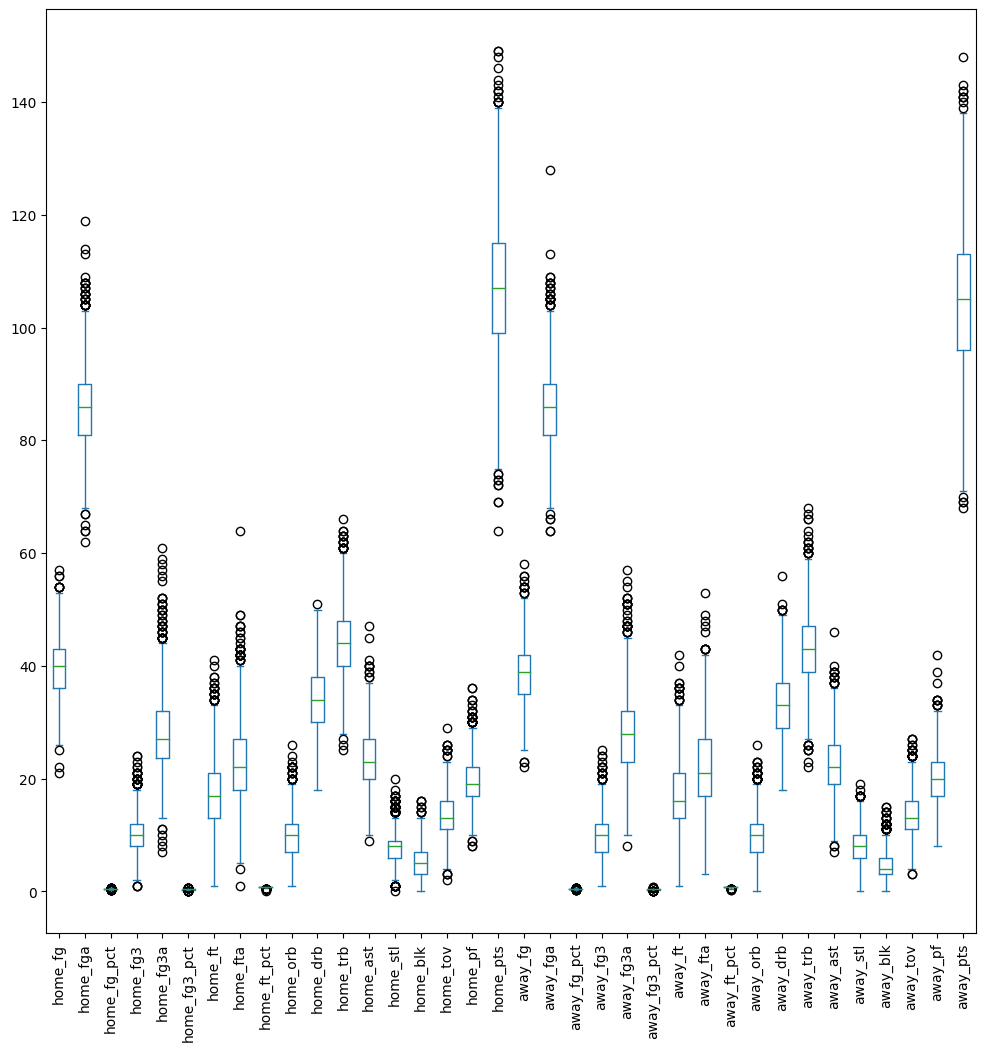

In [21]:
df2[numeric_features].plot.box(figsize=(12, 12), rot=90)
plt.show()

**_Note:_** _There are quite a few outliers. They can probably be fixed by running a log function on the numeric values. See EDA directory for correlation_table excel file._

In [22]:
df2[numeric_features].corr()

,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,home_orb,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
home_fg,1.000000,0.440849,0.772822,0.298114,0.042391,0.357310,-0.200567,-0.193103,-0.045290,0.031352,...,0.025611,0.023896,-0.346183,-0.275517,0.146426,-0.085300,-0.143663,0.066505,-0.145477,0.259298
home_fga,0.440849,1.000000,-0.223978,0.033701,0.231207,-0.178588,-0.219555,-0.202790,-0.079140,0.520885,...,-0.011547,-0.043564,0.406096,0.314177,0.168090,-0.167568,0.267710,0.155643,-0.112339,0.273293
home_fg_pct,0.772822,-0.223978,1.000000,0.300104,-0.116193,0.516655,-0.059923,-0.063266,0.006835,-0.330839,...,0.036487,0.058270,-0.659302,-0.517306,0.040375,0.027967,-0.341394,-0.036677,-0.074771,0.090829
home_fg3,0.298114,0.033701,0.300104,1.000000,0.699808,0.701274,-0.122789,-0.132251,0.008929,-0.143192,...,-0.014090,-0.021888,-0.118814,-0.112040,0.071684,-0.011126,-0.105308,-0.058726,-0.141875,0.100424
home_fg3a,0.042391,0.231207,-0.116193,0.699808,1.000000,0.012347,-0.093559,-0.094282,-0.008656,0.017361,...,-0.035208,-0.039238,0.211827,0.154287,0.102530,-0.016382,-0.065655,0.014372,-0.079696,0.120790
home_fg3_pct,0.357310,-0.178588,0.516655,0.701274,0.012347,1.000000,-0.072441,-0.087966,0.030978,-0.215750,...,0.012272,0.012682,-0.363388,-0.296414,-0.004493,0.003740,-0.082562,-0.086871,-0.118026,0.018640
home_ft,-0.200567,-0.219555,-0.059923,-0.122789,-0.093559,-0.072441,1.000000,0.930989,0.319802,0.052033,...,0.061795,0.016207,-0.082746,-0.059758,0.039522,-0.006076,0.001330,0.028156,0.725420,0.209043
home_fta,-0.193103,-0.202790,-0.063266,-0.132251,-0.094282,-0.087966,0.930989,1.000000,-0.026268,0.093771,...,0.064413,0.022091,-0.024262,-0.007449,0.042475,-0.007765,0.012857,0.034930,0.787242,0.214454
home_ft_pct,-0.045290,-0.079140,0.006835,0.008929,-0.008656,0.030978,0.319802,-0.026268,1.000000,-0.097337,...,0.007313,-0.019326,-0.161085,-0.145888,-0.012769,-0.001076,-0.036504,-0.014057,-0.037608,0.002120
home_orb,0.031352,0.520885,-0.330839,-0.143192,0.017361,-0.215750,0.052033,0.093771,-0.097337,1.000000,...,-0.009412,-0.033698,-0.069337,-0.077539,0.000245,0.042241,0.220545,0.053792,0.084056,0.019319


### Observe categorical / textual data

In [23]:
for cat in string_features:
    print(df2[cat].value_counts())
    print('='*100)

CLE    82
POR    82
MIN    82
HOU    82
LAC    82
DEN    82
SAS    82
NYK    82
CHO    82
UTA    82
DAL    82
MIA    82
OKC    82
DET    82
BRK    82
SAC    82
CHI    82
ATL    82
LAL    82
PHO    82
PHI    82
MEM    82
NOP    82
MIL    82
BOS    82
TOR    82
ORL    82
IND    82
GSW    82
WAS    82
Name: home_team, dtype: int64
NYK    82
UTA    82
PHI    82
CHI    82
MIL    82
POR    82
NOP    82
MEM    82
ATL    82
GSW    82
LAL    82
PHO    82
ORL    82
IND    82
CLE    82
LAC    82
BOS    82
WAS    82
HOU    82
SAC    82
OKC    82
MIN    82
DEN    82
CHO    82
BRK    82
DET    82
MIA    82
DAL    82
SAS    82
TOR    82
Name: away_team, dtype: int64
STAPLES Center                164
Quicken Loans Arena            82
Golden 1 Center                82
Target Center                  82
Toyota Center                  82
AT&T Center                    82
Madison Square Garden (IV)     82
Spectrum Center                82
Vivint Smart Home Arena        82
American Airlines Center       82


## EDA 2019 - 2020

### Examine the current data

This is just a quick visual inspectaion of the data to identify what data types are being used in the data frame.

In [26]:
df3.head()


,date,home_team,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,...,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts,arena
0,"Tue, Oct 16, 2018",BOS,42,97,.433,11,37,.297,10,14,...,6,41,47,18,8,5,16,20,87,TD Garden
1,"Tue, Oct 16, 2018",GSW,42,95,.442,7,26,.269,17,18,...,16,29,45,21,12,6,14,21,100,Oracle Arena
2,"Wed, Oct 17, 2018",CHO,41,92,.446,16,38,.421,14,22,...,11,46,57,26,5,4,21,25,113,Spectrum Center
3,"Wed, Oct 17, 2018",DET,39,92,.424,6,24,.250,19,22,...,5,34,39,28,9,5,17,23,100,Little Caesars Arena
4,"Wed, Oct 17, 2018",IND,47,83,.566,10,26,.385,7,13,...,7,21,28,16,11,3,7,18,83,Bankers Life Fieldhouse


In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          2201 non-null   object
 1   home_team     2201 non-null   object
 2   home_fg       2201 non-null   object
 3   home_fga      2201 non-null   object
 4   home_fg_pct   2201 non-null   object
 5   home_fg3      2201 non-null   object
 6   home_fg3a     2201 non-null   object
 7   home_fg3_pct  2201 non-null   object
 8   home_ft       2201 non-null   object
 9   home_fta      2201 non-null   object
 10  home_ft_pct   2201 non-null   object
 11  home_orb      2201 non-null   object
 12  home_drb      2201 non-null   object
 13  home_trb      2201 non-null   object
 14  home_ast      2201 non-null   object
 15  home_stl      2201 non-null   object
 16  home_blk      2201 non-null   object
 17  home_tov      2201 non-null   object
 18  home_pf       2201 non-null   object
 19  home_p

### Correct data types

In [28]:
# convert appropriate columns to numeric values.

df3[numeric_features] = df3[numeric_features].apply(pd.to_numeric)
df3[date_features] = df3[date_features].apply(pd.to_datetime)

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2201 non-null   datetime64[ns]
 1   home_team     2201 non-null   object        
 2   home_fg       2201 non-null   int64         
 3   home_fga      2201 non-null   int64         
 4   home_fg_pct   2201 non-null   float64       
 5   home_fg3      2201 non-null   int64         
 6   home_fg3a     2201 non-null   int64         
 7   home_fg3_pct  2201 non-null   float64       
 8   home_ft       2201 non-null   int64         
 9   home_fta      2201 non-null   int64         
 10  home_ft_pct   2201 non-null   float64       
 11  home_orb      2201 non-null   int64         
 12  home_drb      2201 non-null   int64         
 13  home_trb      2201 non-null   int64         
 14  home_ast      2201 non-null   int64         
 15  home_stl      2201 non-null   int64   

### Descriptive statistics and identifying correlations and outliers

In [30]:
df3.describe()

,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,home_orb,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,...,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,41.415266,89.039982,0.466185,11.802817,32.815538,0.359705,17.920945,23.308496,0.767368,10.407996,...,0.768495,10.083144,34.251704,44.334848,23.952749,7.716947,4.820990,13.670604,20.958201,110.072694
std,5.216079,7.260493,0.054472,3.806957,7.244468,0.087143,6.231892,7.454088,0.099978,3.674458,...,0.104071,3.697529,5.518669,6.609161,4.936280,2.898797,2.404113,4.060911,4.344806,12.334216
min,21.000000,64.000000,0.269000,2.000000,14.000000,0.118000,2.000000,5.000000,0.375000,2.000000,...,0.263000,0.000000,19.000000,24.000000,10.000000,0.000000,0.000000,3.000000,9.000000,68.000000
25%,38.000000,84.000000,0.429000,9.000000,28.000000,0.300000,13.000000,18.000000,0.706000,8.000000,...,0.700000,7.000000,30.000000,40.000000,20.000000,6.000000,3.000000,11.000000,18.000000,102.000000
50%,41.000000,89.000000,0.465000,12.000000,32.000000,0.357000,17.000000,23.000000,0.773000,10.000000,...,0.773000,10.000000,34.000000,44.000000,24.000000,8.000000,5.000000,13.000000,21.000000,110.000000
75%,45.000000,93.000000,0.505000,14.000000,37.000000,0.417000,22.000000,28.000000,0.833000,13.000000,...,0.840000,12.000000,38.000000,49.000000,27.000000,10.000000,6.000000,16.000000,24.000000,118.000000
max,61.000000,123.000000,0.633000,27.000000,70.000000,0.842000,44.000000,51.000000,1.000000,25.000000,...,1.000000,26.000000,55.000000,71.000000,41.000000,19.000000,14.000000,28.000000,35.000000,168.000000


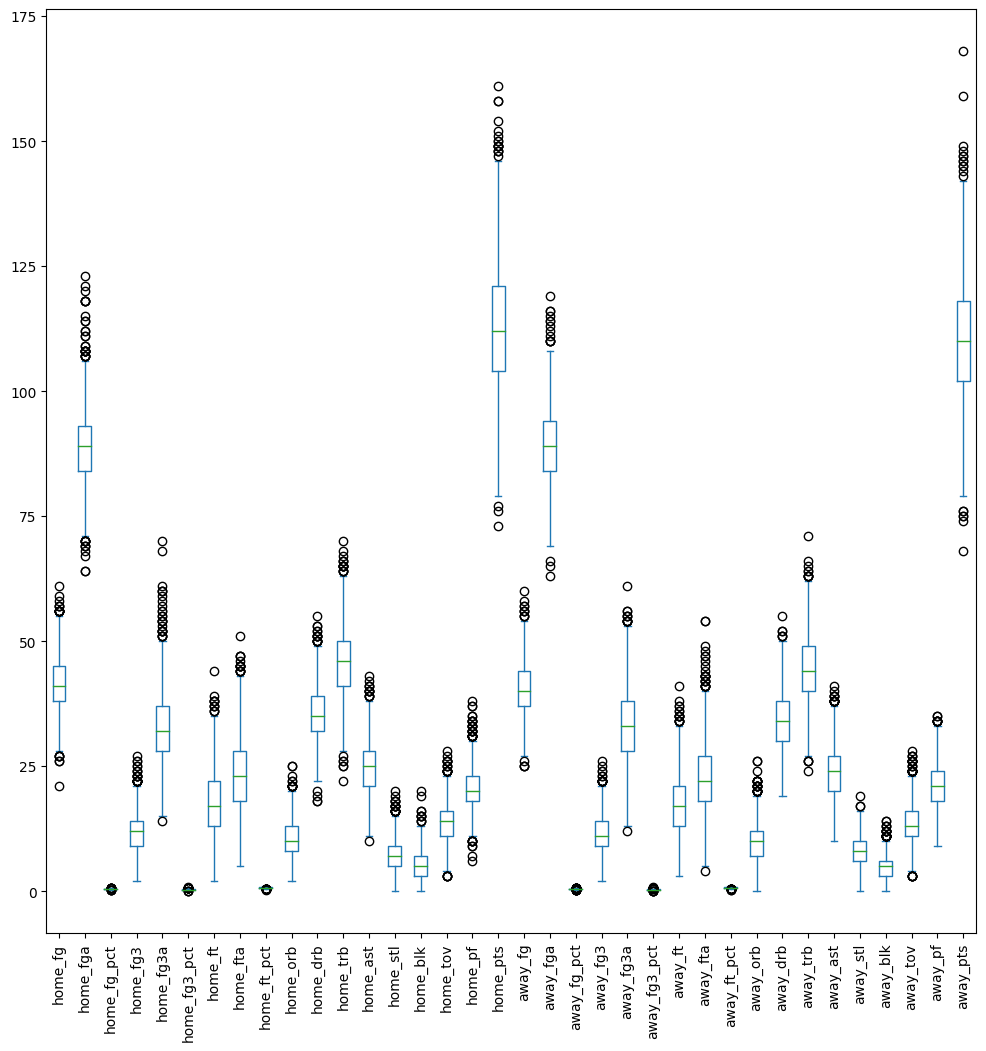

In [31]:
df3[numeric_features].plot.box(figsize=(12, 12), rot=90)
plt.show()

In [32]:
df3[numeric_features].corr()

,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,home_orb,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
home_fg,1.000000,0.425718,0.777982,0.329308,0.014863,0.427831,-0.188619,-0.196952,-0.017575,0.031260,...,0.016199,0.020504,-0.370875,-0.298210,0.073407,-0.106939,-0.136812,0.020602,-0.141497,0.232886
home_fga,0.425718,1.000000,-0.232563,0.122291,0.319585,-0.122607,-0.210976,-0.205444,-0.060136,0.532847,...,0.000388,-0.020560,0.434677,0.351454,0.087373,-0.214655,0.248164,0.114422,-0.113247,0.277829
home_fg_pct,0.777982,-0.232563,1.000000,0.268222,-0.203715,0.544797,-0.055483,-0.068221,0.022524,-0.331904,...,0.017092,0.037352,-0.697712,-0.561694,0.018687,0.034656,-0.318802,-0.056820,-0.072649,0.059537
home_fg3,0.329308,0.122291,0.268222,1.000000,0.683349,0.709600,-0.088637,-0.109500,0.034838,-0.064564,...,0.045241,0.001294,-0.118211,-0.097982,0.054628,-0.012268,-0.029982,-0.041691,-0.121661,0.147426
home_fg3a,0.014863,0.319585,-0.203715,0.683349,1.000000,-0.002346,-0.058135,-0.065275,0.001455,0.116655,...,0.032792,-0.005774,0.248082,0.203919,0.060361,-0.041340,0.003140,0.004516,-0.054573,0.167267
home_fg3_pct,0.427831,-0.122607,0.544797,0.709600,-0.002346,1.000000,-0.057627,-0.080096,0.051044,-0.188613,...,0.035367,0.015316,-0.383116,-0.311335,0.012496,0.026143,-0.036062,-0.050753,-0.108114,0.047421
home_ft,-0.188619,-0.210976,-0.055483,-0.088637,-0.058135,-0.057627,1.000000,0.934019,0.381620,0.013359,...,0.014548,0.048891,-0.075140,-0.035389,0.044931,0.006963,0.012070,0.053016,0.739520,0.212973
home_fta,-0.196952,-0.205444,-0.068221,-0.109500,-0.065275,-0.080096,0.934019,1.000000,0.047960,0.054881,...,0.007939,0.053756,-0.018131,0.014934,0.033466,0.013678,0.020559,0.071442,0.798878,0.205670
home_ft_pct,-0.017575,-0.060136,0.022524,0.034838,0.001455,0.051044,0.381620,0.047960,1.000000,-0.097089,...,0.019068,-0.000556,-0.157431,-0.131766,0.032706,-0.000678,-0.005029,-0.023637,0.025381,0.057129
home_orb,0.031260,0.532847,-0.331904,-0.064564,0.116655,-0.188613,0.013359,0.054881,-0.097089,1.000000,...,0.003044,-0.039701,-0.008227,-0.029081,-0.047779,0.029624,0.201434,-0.016852,0.046196,0.013707


### Observe categorical / textual data

In [33]:
for cat in string_features:
    print(df3[cat].value_counts())
    print('='*100)

CLE    77
PHO    76
ATL    75
GSW    75
DAL    75
CHI    75
OKC    74
DET    74
DEN    74
NYK    74
MEM    74
MIA    73
NOP    73
MIN    73
BRK    73
BOS    73
WAS    73
LAC    73
HOU    73
TOR    73
IND    73
POR    73
PHI    72
SAC    72
MIL    72
UTA    72
ORL    72
LAL    72
CHO    72
SAS    71
Name: home_team, dtype: int64
PHI    75
ORL    75
CHO    75
POR    75
MIL    75
DAL    74
SAS    74
DET    74
IND    74
SAC    74
NYK    74
UTA    74
MIA    74
ATL    74
DEN    73
LAC    73
WAS    73
HOU    73
TOR    73
BRK    73
NOP    73
BOS    73
MIN    73
MEM    73
LAL    73
OKC    72
CHI    72
GSW    72
PHO    71
CLE    70
Name: away_team, dtype: int64
STAPLES Center                145
State Farm Arena               75
American Airlines Center       75
United Center                  75
Talking Stick Resort Arena     75
FedEx Forum                    74
Chesapeake Energy Arena        74
Pepsi Center                   74
Madison Square Garden (IV)     74
Moda Center                    73


**_Note:_** _This two year span had fewer games per team that then 2017 - 2018  period._

## EDA 2021 - 2022

In [35]:
df4 = pd.read_parquet('/content/[2021, 2022]_game_stats.parquet.gzip')

### Examine the current data

In [36]:
df4.head()

,date,home_team,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,...,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts,arena
0,"Tue, Dec 22, 2020",BRK,42,92,.457,15,35,.429,26,32,...,13,34,47,26,6,6,18,24,99,Barclays Center
1,"Tue, Dec 22, 2020",LAL,38,81,.469,9,29,.310,24,31,...,11,29,40,22,10,3,16,29,116,STAPLES Center
2,"Wed, Dec 23, 2020",CLE,46,87,.529,14,30,.467,15,20,...,8,24,32,29,10,4,15,17,114,Rocket Mortgage Fieldhouse
3,"Wed, Dec 23, 2020",IND,46,94,.489,8,34,.235,21,29,...,5,35,40,25,8,8,16,27,107,Bankers Life Fieldhouse
4,"Wed, Dec 23, 2020",ORL,42,88,.477,10,28,.357,19,30,...,7,36,43,25,11,2,22,21,107,Amway Center


In [37]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          2224 non-null   object
 1   home_team     2224 non-null   object
 2   home_fg       2224 non-null   object
 3   home_fga      2224 non-null   object
 4   home_fg_pct   2224 non-null   object
 5   home_fg3      2224 non-null   object
 6   home_fg3a     2224 non-null   object
 7   home_fg3_pct  2224 non-null   object
 8   home_ft       2224 non-null   object
 9   home_fta      2224 non-null   object
 10  home_ft_pct   2224 non-null   object
 11  home_orb      2224 non-null   object
 12  home_drb      2224 non-null   object
 13  home_trb      2224 non-null   object
 14  home_ast      2224 non-null   object
 15  home_stl      2224 non-null   object
 16  home_blk      2224 non-null   object
 17  home_tov      2224 non-null   object
 18  home_pf       2224 non-null   object
 19  home_p

### Correct data types

In [38]:
df4[numeric_features] = df4[numeric_features].apply(pd.to_numeric)
df4[date_features] = df4[date_features].apply(pd.to_datetime)

In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2224 non-null   datetime64[ns]
 1   home_team     2224 non-null   object        
 2   home_fg       2224 non-null   int64         
 3   home_fga      2224 non-null   int64         
 4   home_fg_pct   2224 non-null   float64       
 5   home_fg3      2224 non-null   int64         
 6   home_fg3a     2224 non-null   int64         
 7   home_fg3_pct  2224 non-null   float64       
 8   home_ft       2224 non-null   int64         
 9   home_fta      2224 non-null   int64         
 10  home_ft_pct   2224 non-null   float64       
 11  home_orb      2224 non-null   int64         
 12  home_drb      2224 non-null   int64         
 13  home_trb      2224 non-null   int64         
 14  home_ast      2224 non-null   int64         
 15  home_stl      2224 non-null   int64   

### Descriptive statistics and identifying correlations and outliers

In [42]:
df4.describe()

,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,home_orb,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,...,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.00000,2224.000000
mean,40.979317,87.986960,0.466619,12.652878,35.084532,0.360283,17.173112,22.132194,0.776844,10.133543,...,0.777425,10.055755,33.935701,43.991457,24.348921,7.635791,4.657374,13.196493,19.67491,110.388939
std,5.237974,6.894051,0.055066,3.842257,6.835846,0.083065,5.904410,7.200400,0.101441,3.700393,...,0.103810,3.684052,5.351849,6.463463,4.967335,2.890799,2.346015,3.730769,4.17606,12.608728
min,23.000000,67.000000,0.277000,3.000000,10.000000,0.089000,3.000000,4.000000,0.308000,1.000000,...,0.316000,1.000000,18.000000,25.000000,8.000000,0.000000,0.000000,2.000000,7.00000,75.000000
25%,37.000000,83.000000,0.427000,10.000000,30.000000,0.304000,13.000000,17.000000,0.710000,8.000000,...,0.714000,7.000000,30.000000,39.000000,21.000000,6.000000,3.000000,11.000000,17.00000,102.000000
50%,41.000000,88.000000,0.467000,12.000000,35.000000,0.358000,17.000000,22.000000,0.778000,10.000000,...,0.783500,10.000000,34.000000,44.000000,24.000000,7.000000,4.000000,13.000000,20.00000,110.000000
75%,44.000000,92.000000,0.505000,15.000000,40.000000,0.417000,21.000000,27.000000,0.846000,12.000000,...,0.850000,12.000000,37.000000,48.000000,28.000000,10.000000,6.000000,16.000000,22.00000,119.000000
max,60.000000,115.000000,0.654000,28.000000,58.000000,0.645000,37.000000,49.000000,1.000000,24.000000,...,1.000000,26.000000,54.000000,66.000000,41.000000,19.000000,15.000000,30.000000,33.00000,158.000000


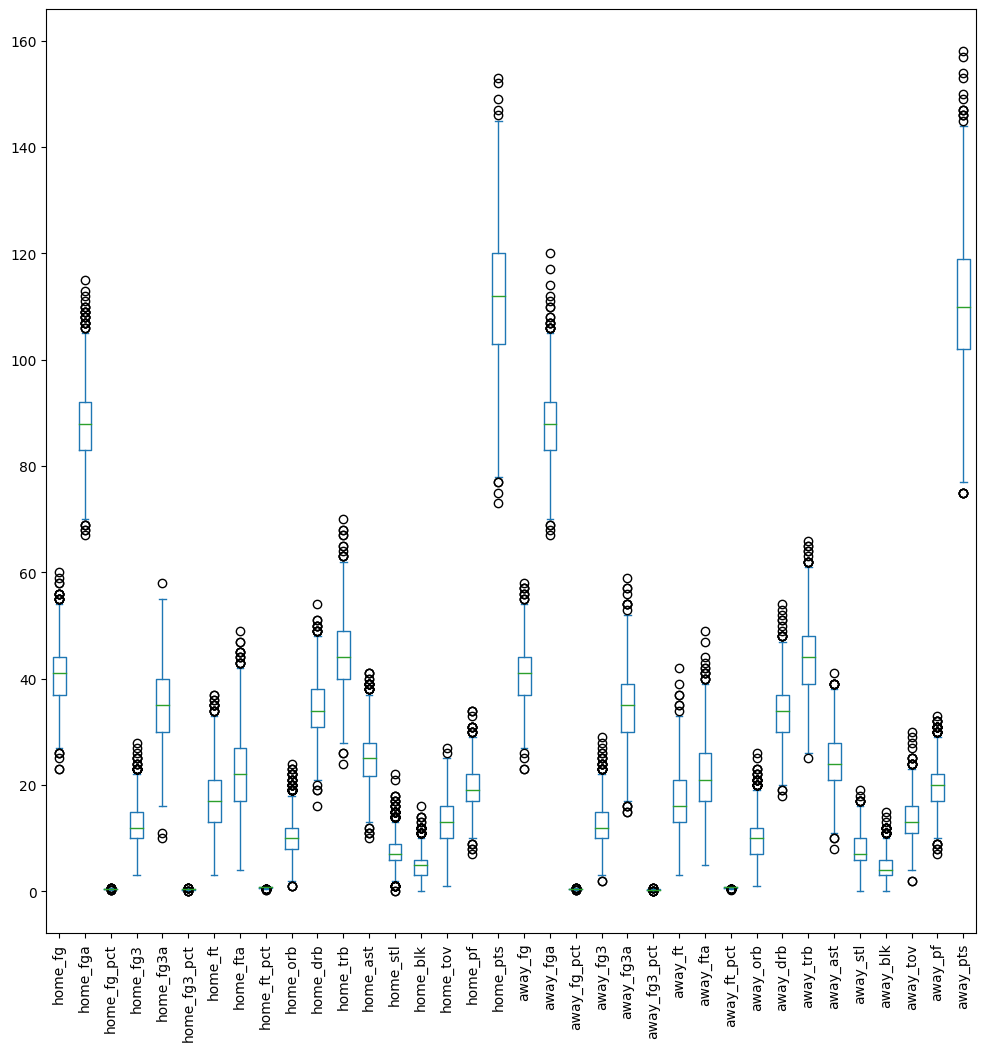

In [43]:
df4[numeric_features].plot.box(figsize=(12, 12), rot=90)
plt.show()

In [44]:
df4[numeric_features].corr()

,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,home_orb,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
home_fg,1.000000,0.428859,0.798596,0.316970,-0.063785,0.464396,-0.196463,-0.203812,-0.002575,0.053801,...,0.004276,-0.004136,-0.416017,-0.346826,0.072927,-0.068708,-0.113364,0.003891,-0.174699,0.182806
home_fga,0.428859,1.000000,-0.196496,0.074908,0.230516,-0.095999,-0.271671,-0.262993,-0.055827,0.571323,...,0.015781,-0.040602,0.361537,0.276216,0.097037,-0.185193,0.238947,0.158523,-0.195819,0.188710
home_fg_pct,0.798596,-0.196496,1.000000,0.292833,-0.223157,0.568722,-0.029922,-0.044342,0.035781,-0.315898,...,-0.003307,0.022940,-0.691860,-0.559796,0.016483,0.051223,-0.279023,-0.101544,-0.056615,0.076661
home_fg3,0.316970,0.074908,0.292833,1.000000,0.660388,0.749396,-0.147613,-0.179004,0.050258,-0.078557,...,-0.035083,0.002862,-0.178501,-0.146171,-0.013261,-0.016207,-0.131026,-0.027563,-0.174436,0.017078
home_fg3a,-0.063785,0.230516,-0.223157,0.660388,1.000000,0.021846,-0.148149,-0.161782,0.006091,0.093647,...,-0.028530,0.000992,0.214099,0.177843,0.006815,-0.012623,-0.107000,0.066094,-0.128095,0.017416
home_fg3_pct,0.464396,-0.095999,0.568722,0.749396,0.021846,1.000000,-0.068510,-0.099053,0.061139,-0.182886,...,-0.020279,0.007303,-0.411785,-0.336802,-0.020722,-0.011877,-0.081552,-0.089096,-0.114507,0.010660
home_ft,-0.196463,-0.271671,-0.029922,-0.147613,-0.148149,-0.068510,1.000000,0.930369,0.321159,0.014260,...,0.005025,0.005409,-0.115640,-0.092669,0.089199,-0.036971,-0.024587,0.000150,0.730214,0.212943
home_fta,-0.203812,-0.262993,-0.044342,-0.179004,-0.161782,-0.099053,0.930369,1.000000,-0.026789,0.044010,...,-0.001570,0.010440,-0.046485,-0.032540,0.104521,-0.026797,-0.001818,0.014589,0.787738,0.220807
home_ft_pct,-0.002575,-0.055827,0.035781,0.050258,0.006091,0.061139,0.321159,-0.026789,1.000000,-0.067066,...,0.023662,-0.007782,-0.189349,-0.161219,-0.026882,-0.039464,-0.069271,-0.044043,-0.026109,0.015256
home_orb,0.053801,0.571323,-0.315898,-0.078557,0.093647,-0.182886,0.014260,0.044010,-0.067066,1.000000,...,-0.021532,-0.029057,-0.039067,-0.048910,0.044208,-0.015216,0.181299,0.043196,0.037132,0.012191


### Observe categorical / textual data

In [45]:
for cat in string_features:
    print(df4[cat].value_counts())
    print('='*100)

NOP    78
PHO    78
BRK    77
DEN    77
MIA    77
PHI    76
TOR    76
BOS    76
MIN    76
MEM    75
WAS    74
DAL    74
LAC    74
UTA    74
NYK    74
MIL    74
CHI    74
ORL    74
GSW    74
POR    73
SAS    73
SAC    73
ATL    73
HOU    73
LAL    72
OKC    72
CLE    72
IND    71
CHO    70
DET    70
Name: home_team, dtype: int64
ATL    80
MIN    77
UTA    77
GSW    76
CHI    76
DAL    76
MIL    76
DET    75
CLE    75
PHI    75
TOR    75
NOP    75
MEM    75
CHO    75
BRK    74
LAC    74
BOS    74
PHO    73
DEN    73
OKC    73
IND    73
MIA    73
LAL    73
HOU    72
SAC    72
SAS    72
POR    72
ORL    71
WAS    71
NYK    71
Name: away_team, dtype: int64
Crypto.com Arena              83
Smoothie King Center          78
Phoenix Suns Arena            78
Barclays Center               77
Ball Arena                    77
Wells Fargo Center            76
TD Garden                     76
Target Center                 76
FedEx Forum                   75
Capital One Arena             74
United Cen

## Observations

1. It appears there are some correlations and I have included an excel sheet in the **ea** directory which is color coded to show the strongest correlations. Over all the year periods, the one constant correlation appears to be between **home_ft** and **home_fta**. The correlation value is 0.93. Another strong correlation is **away_pts** and **away_fg** with a correlation value of 0.87.


2. We should be able to transform the home team and away team using some sort of ordinal encoding where 1 stands for home team and 2 stands for away team and 0 means the team is excluded.

3. There were quite a few outliers in the data and these may be fixable by using a log process on the values.

4. I noticed the number of games the teams played went down after 2018. This may have been due to the COVID pandemic which was became more impactful during late 2019 to early 2020 and extended into 2022.